In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv('data_process1.csv')
dataset = data_df
dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
X = preprocessing.scale(X)

### Voting Classifier Train-Test Split

In [3]:
#70 - 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state= 4)
clf1 = LogisticRegression(random_state=4)
clf2 = RandomForestClassifier(random_state=4)
clf3 = SVC(kernel='linear', C=0.624974423446755,probability=True)
clf4 = SVC(kernel='rbf', C= 57.296107349133315,gamma=0.004059323094735449,probability=True)
clf5 = SVC(kernel='poly',C= 44.862787773900145,gamma=0.017,probability=True)
clf6 = dt = DecisionTreeClassifier(random_state=4)
labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree']

Classification report is:               precision    recall  f1-score   support

        0.0       0.84      0.93      0.88       193
        1.0       0.90      0.77      0.83       151

avg / total       0.86      0.86      0.86       344

Accuracy is:  0.860465116279


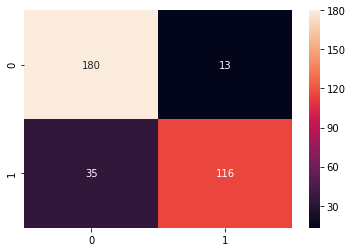

In [4]:
#train-test split for hard classifier
eclft1 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6],voting='hard')
eclft1 = eclft1.fit(X_train, y_train)
predictions = eclft1.predict(X_test)

# classification report
print("Classification report is: ",classification_report(y_test,predictions))

# accuracy
print("Accuracy is: ", metrics.accuracy_score(y_test, predictions))

# confusion matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d")

Classification report is:               precision    recall  f1-score   support

        0.0       0.92      0.89      0.91       193
        1.0       0.87      0.90      0.88       151

avg / total       0.90      0.90      0.90       344

Accuracy is:  0.895348837209


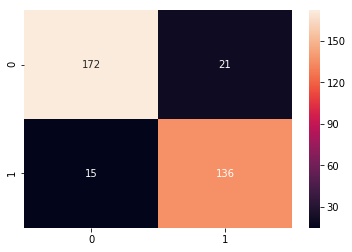

In [5]:
#train-test split for soft classifier
eclft2 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6],voting='soft')
eclft2 = eclft2.fit(X_train, y_train)
predictions2 = eclft2.predict(X_test)

# classification report
print("Classification report is: ",classification_report(y_test,predictions2))

# accuracy
print("Accuracy is: ", metrics.accuracy_score(y_test, predictions2))

# confusion matrix
cm = confusion_matrix(y_test,predictions2)
sns.heatmap(cm,annot=True,fmt="d")

### Voting Classifier Cross Validation

In [6]:
print('10-fold cross validation on other classifiers:\n')
for clf, label in zip([clf1, clf2, clf3, clf4,clf5,clf6], labels):
    scores = model_selection.cross_val_score(clf, X, y.ravel(),cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))

10-fold cross validation on other classifiers:

Accuracy: 0.72 (+/- 0.12) [Logistic Regression]
Accuracy: 0.72 (+/- 0.13) [Random Forest]
Accuracy: 0.72 (+/- 0.11) [SVM Linear]
Accuracy: 0.76 (+/- 0.12) [SVM rbf]
Accuracy: 0.65 (+/- 0.10) [SVM poly]
Accuracy: 0.68 (+/- 0.15) [Decision Tree]


In [7]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6], weights=[1,1,1,1,1,1],voting='soft')

In [8]:
#soft voting classifier

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree', 'soft ensemble']
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], labels):
    scores = model_selection.cross_val_score(clf, X, y.ravel(), cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.12) [Logistic Regression]
Accuracy: 0.72 (+/- 0.13) [Random Forest]
Accuracy: 0.72 (+/- 0.11) [SVM Linear]
Accuracy: 0.76 (+/- 0.12) [SVM rbf]
Accuracy: 0.65 (+/- 0.10) [SVM poly]
Accuracy: 0.68 (+/- 0.15) [Decision Tree]
Accuracy: 0.74 (+/- 0.14) [soft ensemble]


In [9]:
#hard voting classifier
eclf3 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5,clf6], voting='hard')

labels = ['Logistic Regression', 'Random Forest', 'SVM Linear', 'SVM rbf', 'SVM poly' , 'Decision Tree', 'hard ensemble']
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf3], labels):
    scores = model_selection.cross_val_score(clf, X, y.ravel(), cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.12) [Logistic Regression]
Accuracy: 0.72 (+/- 0.13) [Random Forest]
Accuracy: 0.72 (+/- 0.11) [SVM Linear]
Accuracy: 0.76 (+/- 0.12) [SVM rbf]
Accuracy: 0.65 (+/- 0.10) [SVM poly]
Accuracy: 0.68 (+/- 0.15) [Decision Tree]
Accuracy: 0.74 (+/- 0.13) [hard ensemble]
